In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

In [2]:
# The class for plot the diagram

class plot_error_surfaces(object):
    
    # Constructor
    def __init__(self, w_range, b_range, X, Y, n_samples = 30, go = True):
        W = np.linspace(-w_range, w_range, n_samples)
        B = np.linspace(-b_range, b_range, n_samples)
        w, b = np.meshgrid(W, B)    
        Z = np.zeros((30, 30))
        count1 = 0
        self.y = Y.numpy()
        self.x = X.numpy()
        for w1, b1 in zip(w, b):
            count2 = 0
            for w2, b2 in zip(w1, b1):
                Z[count1, count2] = np.mean((self.y - w2 * self.x + b2) ** 2)
                count2 += 1
            count1 += 1
        self.Z = Z
        self.w = w
        self.b = b
        self.W = []
        self.B = []
        self.LOSS = []
        self.n = 0
        if go == True:
            plt.figure()
            plt.figure(figsize = (7.5, 5))
            plt.axes(projection = '3d').plot_surface(self.w, self.b, self.Z, rstride = 1, cstride = 1,cmap = 'viridis', edgecolor = 'none')
            plt.title('Loss Surface')
            plt.xlabel('w')
            plt.ylabel('b')
            plt.show()
            plt.figure()
            plt.title('Loss Surface Contour')
            plt.xlabel('w')
            plt.ylabel('b')
            plt.contour(self.w, self.b, self.Z)
            plt.show()
    
    # Setter
    def set_para_loss(self, W, B, loss):
        self.n = self.n + 1
        self.W.append(W)
        self.B.append(B)
        self.LOSS.append(loss)
    
    # Plot diagram
    def final_plot(self): 
        ax = plt.axes(projection = '3d')
        ax.plot_wireframe(self.w, self.b, self.Z)
        ax.scatter(self.W, self.B, self.LOSS, c = 'r', marker = 'x', s = 200, alpha = 1)
        plt.figure()
        plt.contour(self.w, self.b, self.Z)
        plt.scatter(self.W, self.B, c = 'r', marker = 'x')
        plt.xlabel('w')
        plt.ylabel('b')
        plt.show()
    
    # Plot diagram
    def plot_ps(self):
        plt.subplot(121)
        plt.ylim
        plt.plot(self.x, self.y, 'ro', label = "training points")
        plt.plot(self.x, self.W[-1] * self.x + self.B[-1], label = "estimated line")
        plt.xlabel('x')
        plt.ylabel('y')
        plt.ylim((-10, 15))
        plt.title('Data Space Iteration: ' + str(self.n))
        plt.subplot(122)
        plt.contour(self.w, self.b, self.Z)
        plt.scatter(self.W, self.B, c = 'r', marker = 'x')
        plt.title('Loss Surface Contour Iteration' + str(self.n))
        plt.xlabel('w')
        plt.ylabel('b')
        plt.show()

In [3]:
torch.manual_seed(1)

In [4]:
# setup the actual data and simulated data

X = torch.arange(-3, 3, 0.1).view(-1,1)
f = 1 * X - 1
Y = f + 0.1 * torch.randn(X.size())

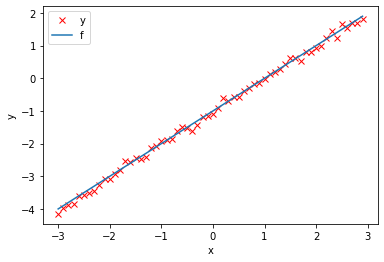

In [5]:
plt.plot(X.numpy(), Y.numpy(), 'rx', label = 'y')
plt.plot(X.numpy(), f.numpy(), label = 'f')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

In [6]:
# create model and cost function(Total loss)

# define forward function
def forward(x):
    return w*x + b

In [7]:
# def MSE loss function

def criterion(yhat,y):
    return torch.mean((yhat-y)**2)

<Figure size 432x288 with 0 Axes>

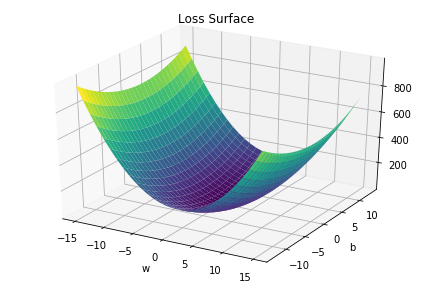

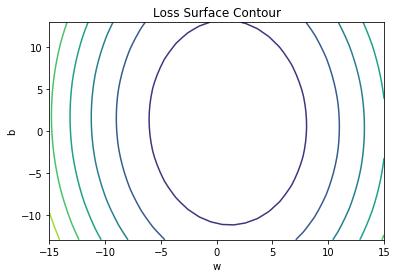

In [8]:
get_surface = plot_error_surfaces(15, 13, X, Y, 30)

In [9]:
# Train the model: Batch Gradient Descent

# define the parameters
w = torch.tensor(-15.0, requires_grad = True)
b = torch.tensor(-10.0, requires_grad = True)

In [10]:
# define learning rate and empty list for loss

lr = 0.1
LOSS_BGD = []

In [11]:
# Train the model

def train_model(iter):
    
    # loop
    for epoch in range(iter):
        # make prediction
        Yhat = forward(X)
        
        # calculate loss
        loss = criterion(Yhat,Y)
        
        # section for plotting
        get_surface.set_para_loss(w.data.tolist(), b.data.tolist(), loss.tolist())
        get_surface.plot_ps()
        
        # store the loss
        LOSS_BGD.append(loss)
        
        # backward
        loss.backward()
        
        # update slope and bias
        w.data = w.data - lr*w.grad.data
        b.data = b.data - lr*b.grad.data
        
        # zero the gradients
        w.grad.data.zero_()
        b.grad.data.zero_()

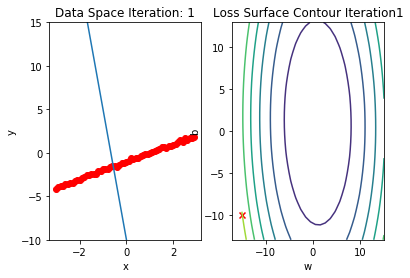

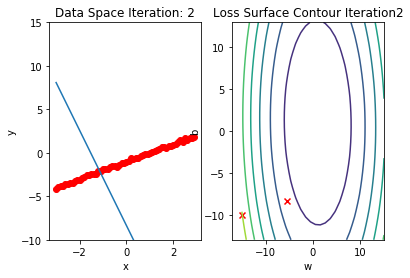

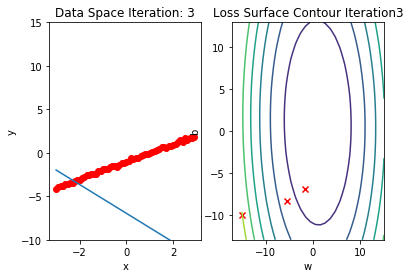

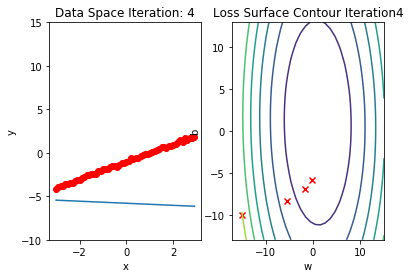

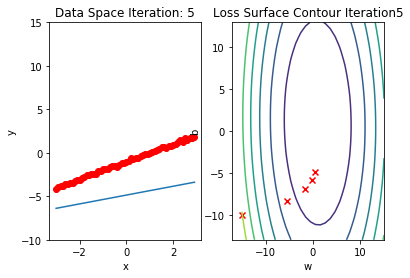

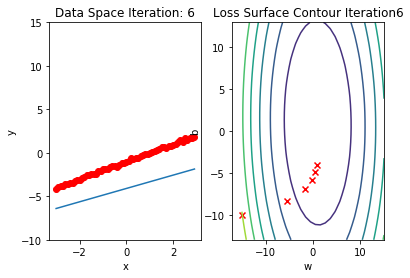

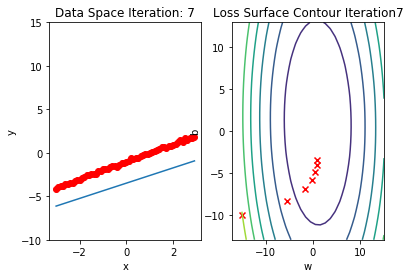

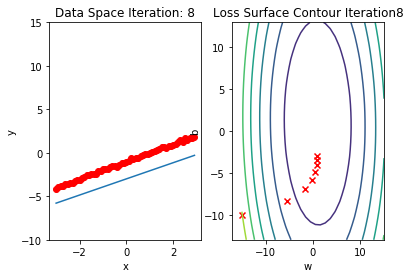

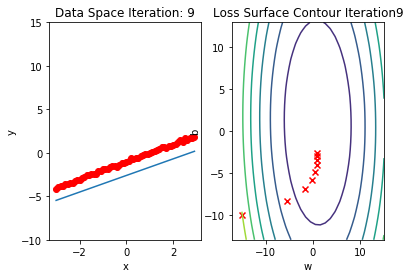

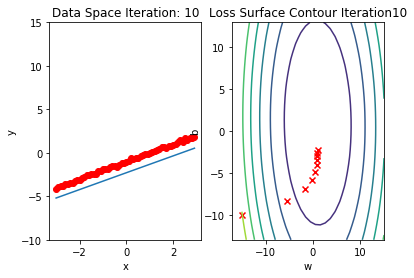

In [12]:
train_model(10)

In [14]:
# Train the Model: Stochastic gradient descent

get_surface = plot_error_surfaces(15, 13, X, Y, 30, go=False)

In [15]:
# The function for training the model

LOSS_SGD = []
w = torch.tensor(-15.0, requires_grad = True)
b = torch.tensor(-10.0, requires_grad = True)

def train_model_SGD(iter):
    
    # Loop
    for epoch in range(iter):
        
        # SGD is an approximation of out true total loss/cost, in this line of code we calculate our true loss/cost and store it
        Yhat = forward(X)

        # store the loss 
        LOSS_SGD.append(criterion(Yhat, Y).tolist())
        
        for x, y in zip(X, Y):
            
            # make a pridiction
            yhat = forward(x)
        
            # calculate the loss 
            loss = criterion(yhat, y)

            # Section for plotting
            get_surface.set_para_loss(w.data.tolist(), b.data.tolist(), loss.tolist())
        
            # backward pass: compute gradient of the loss with respect to all the learnable parameters
            loss.backward()
        
            # update parameters slope and bias
            w.data = w.data - lr * w.grad.data
            b.data = b.data - lr * b.grad.data

            # zero the gradients before running the backward pass
            w.grad.data.zero_()
            b.grad.data.zero_()
            
        #plot surface and data space after each epoch    
        get_surface.plot_ps()

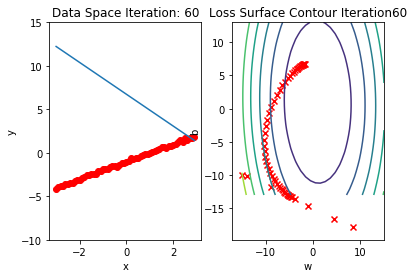

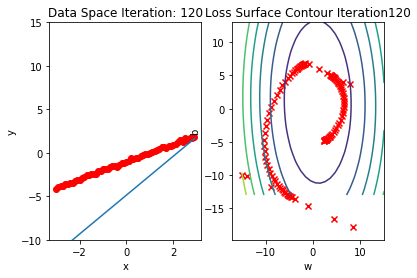

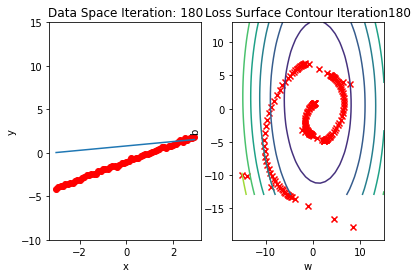

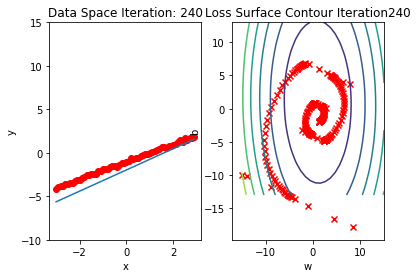

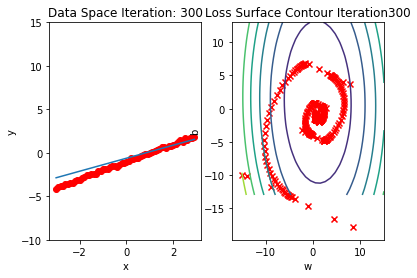

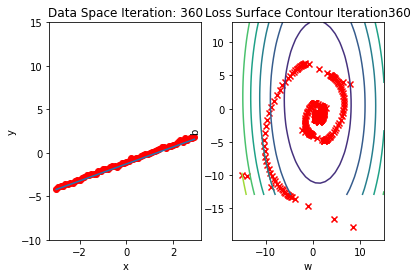

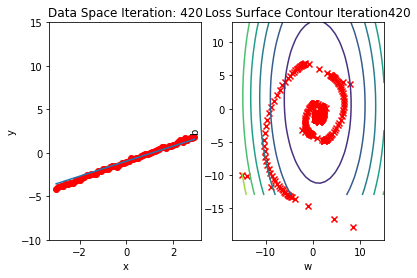

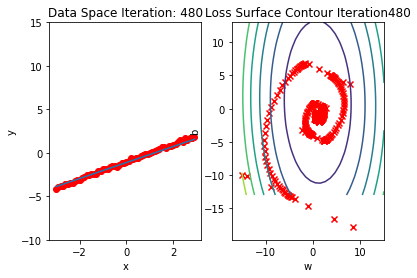

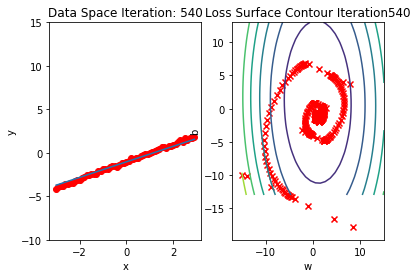

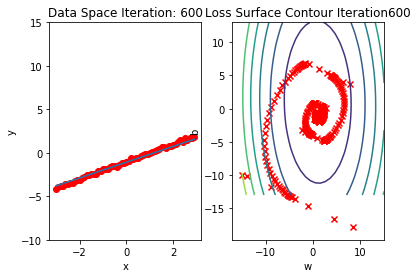

In [16]:
train_model_SGD(10)

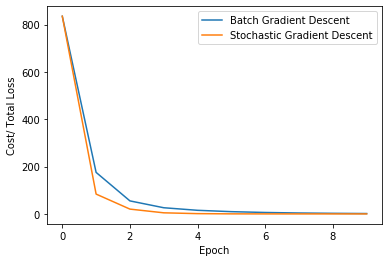

In [17]:
# plot out the LOSS_BGD and LOSS_SGD

plt.plot(LOSS_BGD, label = 'Batch Gradient Descent')
plt.plot(LOSS_SGD, label = 'Stochastic Gradient Descent')
plt.xlabel('Epoch')
plt.ylabel('Cost/ Total Loss')
plt.legend()
plt.show()


In [18]:
# SGD with Dataset Dataloader

from torch.utils.data import Dataset, DataLoader

In [21]:
# Dataset class

class Data(Dataset):
    
    # constructor
    def __init__(self):
        self.x = torch.arange(-3, 3, 0.1).view(-1,1)
        self.y = 1 * self.x - 1
        self.len = self.x.shape[0]
        
    # Getter
    def __getitem__(self,index):
        return self.x[index], self.y[index]
    
    # return length
    def __len__(self):
        return self.len

In [22]:
dataset = Data()
print('The length of dataset:', len(dataset))

The length of dataset: 60


In [23]:
# print first item
x, y = dataset[0]
print("(", x ,",", y ,")")

( tensor([-3.]) , tensor([-4.]) )


In [24]:
# print first 3 points

x, y = dataset[0:3]
print('The first 3x:', x)
print('The first 3y:', y)

The first 3x: tensor([[-3.0000],
        [-2.9000],
        [-2.8000]])
The first 3y: tensor([[-4.0000],
        [-3.9000],
        [-3.8000]])


In [25]:
get_surface = plot_error_surfaces(15, 13, X, Y, 30, go=False)

In [26]:
# create DataLoader

trainloader = DataLoader(dataset=dataset, batch_size=1)

In [27]:
# function for training model

w = torch.tensor(-15.0, requires_grad=True)
b = torch.tensor(-10.0, requires_grad=True)
LOSS_Loader = []

def train_model_DataLoader(epochs):
    
    # loop
    for epoch in range(epochs):
        Yhat = forward(X)
        
        # store the loss
        LOSS_Loader.append(criterion(Yhat,Y).tolist())
        
        for x, y in trainloader:
            
            # make prediction
            yhat = forward(x)
            
            # calculate loss
            loss = criterion(yhat,y)
            
            # section for plotting
            get_surface.set_para_loss(w.data.tolist(), b.data.tolist(), loss.tolist())
            
            # backward
            loss.backward()
            
            # update the slope and bias
            w.data = w.data - lr*w.grad.data
            b.data = b.data - lr*b.grad.data
            
            # zero gradients
            w.grad.data.zero_()
            b.grad.data.zero_()
            
        get_surface.plot_ps()

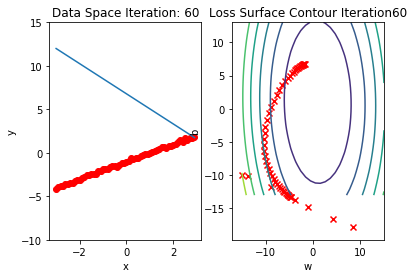

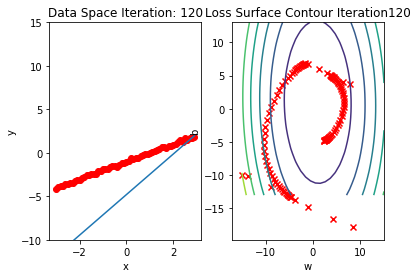

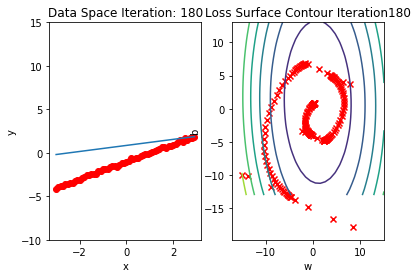

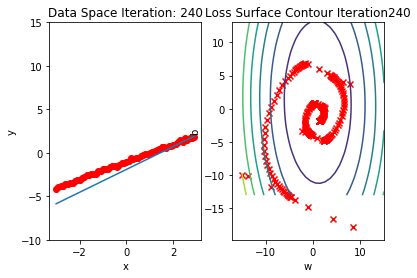

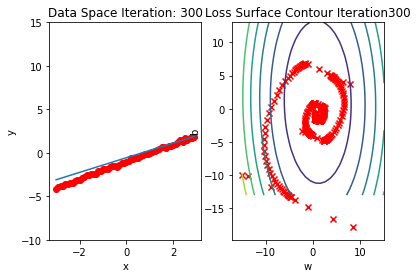

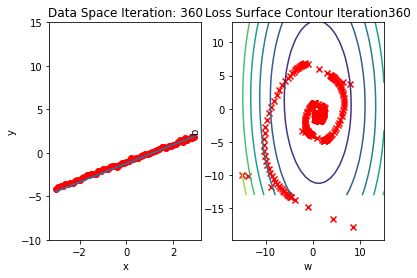

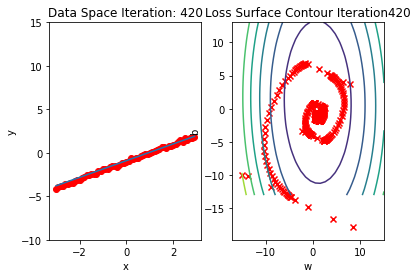

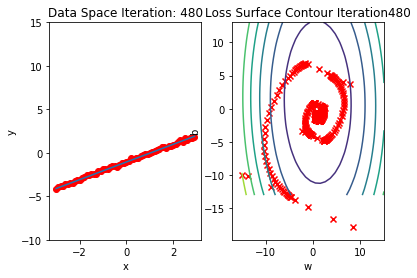

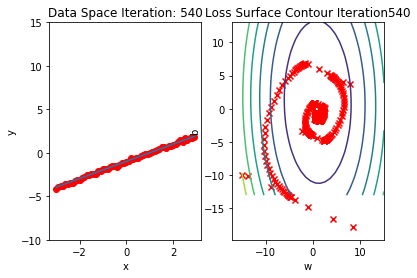

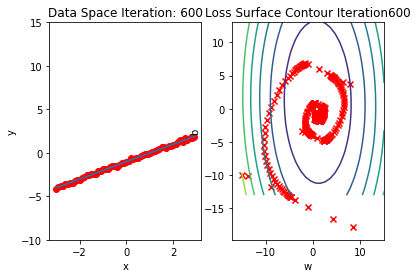

In [28]:
train_model_DataLoader(10)

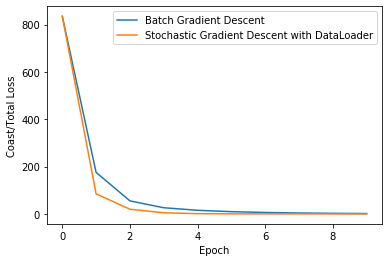

In [29]:
plt.plot(LOSS_BGD, label = 'Batch Gradient Descent')
plt.plot(LOSS_Loader, label = 'Stochastic Gradient Descent with DataLoader')
plt.xlabel('Epoch')
plt.ylabel('Coast/Total Loss')
plt.legend()
plt.show()